# Persona Analysis
### Comprehensive analysis of all persona variables with distributions, charts, and statistics


In [27]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.family'] = 'DejaVu Sans'



## 1. Load JSON Files

In [28]:
# List of JSON file paths to analyze
json_files = [
    'personas/batch_output_1760799172.8845038.jsonl',
]


def load_file(file_path):
    try:
        with open(file_path, 'r', encoding='utf-8') as f:
            data = [json.loads(line) for line in f]
            return data
    except Exception as e:
        print(f"Error loading {file_path}: {e}")
        return []
    
all_data = {}

for file in json_files:
    print(f"Loading file: {file}")
    data = load_file(file)
    all_data[file] = data
    print(f"  - Loaded {len(data)} batches from {file}")
    for i, batch in enumerate(data):
        print(f"    - Batch {i+1}: {len(batch)} personas")

Loading file: personas/batch_output_1760799172.8845038.jsonl
  - Loaded 20 batches from personas/batch_output_1760799172.8845038.jsonl
    - Batch 1: 10 personas
    - Batch 2: 10 personas
    - Batch 3: 10 personas
    - Batch 4: 10 personas
    - Batch 5: 10 personas
    - Batch 6: 10 personas
    - Batch 7: 10 personas
    - Batch 8: 10 personas
    - Batch 9: 10 personas
    - Batch 10: 10 personas
    - Batch 11: 10 personas
    - Batch 12: 10 personas
    - Batch 13: 10 personas
    - Batch 14: 10 personas
    - Batch 15: 10 personas
    - Batch 16: 10 personas
    - Batch 17: 10 personas
    - Batch 18: 10 personas
    - Batch 19: 10 personas
    - Batch 20: 10 personas


## 2. Flatten and Structure Data


In [29]:
# Flatten nested JSON structure into DataFrame
def flatten_persona(all_data):
    flat_personas = []
    for file in all_data:
        print(f"Processing file {file}...")
        for batch in all_data[file]:
            for persona in batch:
                flat_personas.append(persona)
    return flat_personas

flatten_persona_data = flatten_persona(all_data)


print(f"\n✅ Total personas loaded: {len(flatten_persona_data)}")

Processing file personas/batch_output_1760799172.8845038.jsonl...

✅ Total personas loaded: 200


In [30]:
# Creating DataFrame
df = pd.DataFrame(flatten_persona_data)
print("\nDataFrame Info:")
print(df.info())


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   age                             200 non-null    int64 
 1   gender                          200 non-null    object
 2   marital_status                  200 non-null    object
 3   children                        200 non-null    object
 4   living_situation                200 non-null    object
 5   general_health                  200 non-null    object
 6   chronic_disease                 199 non-null    object
 7   mobility                        200 non-null    object
 8   hearing_senses                  200 non-null    object
 9   vision_senses                   200 non-null    object
 10  daily_energy                    200 non-null    object
 11  personality_type                200 non-null    object
 12  cognitive_status                2

## 3. Basic Statistics Overview


In [31]:
# Display first few rows
print("=" * 100)
print("SAMPLE DATA (First 3 Personas)")
print("=" * 100)
print(df.head(3).to_string())

# Basic statistics
print("\n" + "=" * 100)
print("BASIC STATISTICS")
print("=" * 100)
print(f"Total number of personas: {len(df)}")
print(f"Number of features: {df.shape[1]}")
print(f"\nMissing values per column:")
print(df.isnull().sum()[df.isnull().sum() > 0])

# Data types
print(f"\nData types:")
print(df.dtypes)


SAMPLE DATA (First 3 Personas)
   age  gender marital_status children    living_situation general_health           chronic_disease             mobility hearing_senses vision_senses daily_energy personality_type    cognitive_status dominant_emotion emotional_intelligence       iq attitude_toward_aging main_social_role social_support social_participation                 income  economic_decile   housing religion_and_sect           internalized_moral_traits religiosity_level ethnicity language important_personal_experiences life_satisfaction meaning_and_purpose_in_old_age
0   72    Male        Married      2-3  Living with Family           Good       High Blood Pressure          Independent           Good          Good      Average             INTJ      Healthy Memory             Calm                   High     High            Acceptance          Retired   Large Family               Active     Retirement Pension                7  Own Home       Shia Muslim  [Intellectual, Reserved, Pridef

## 4. Demographic Analysis (Age & Gender)


AGE DISTRIBUTION

Age statistics:
count    200.000000
mean      74.480000
std        7.697784
min       65.000000
25%       68.000000
50%       72.000000
75%       80.000000
max       90.000000
Name: age, dtype: float64

Age range: 65 - 90
Most common age: 66

Age frequency table:
age
65     2
66    21
67    15
68    17
69    18
70    16
71     1
72    19
73     2
74     7
75    15
76     2
77     1
78    10
79     1
80     9
81     1
82     5
85    17
88     2
89     1
90    18

GENDER DISTRIBUTION

Gender counts:
  Male: 104 (52.00%)
  Female: 96 (48.00%)


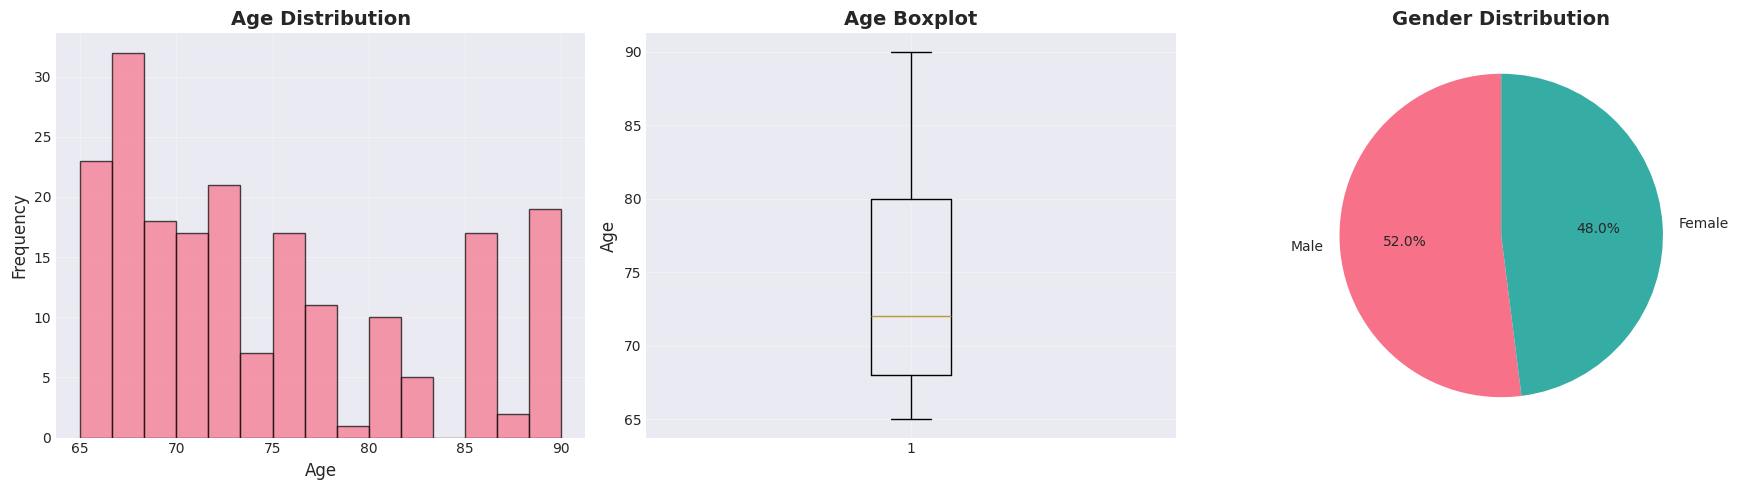


AGE BY GENDER
        count       mean      std   min    25%   50%   75%   max
gender                                                          
Female   96.0  72.229167  6.58144  65.0  67.00  70.0  75.0  90.0
Male    104.0  76.557692  8.09030  66.0  69.75  74.0  85.0  90.0


In [ ]:
# AGE ANALYSIS
print("=" * 100)
print("AGE DISTRIBUTION")
print("=" * 100)
print(f"\nAge statistics:")
print(df['age'].describe())
print(f"\nAge range: {df['age'].min()} - {df['age'].max()}")
print(f"Most common age: {df['age'].mode()[0] if not df['age'].mode().empty else 'N/A'}")

# Age distribution table
age_counts = df['age'].value_counts().sort_index()
print(f"\nAge frequency table:")
print(age_counts.to_string())

# GENDER ANALYSIS
print("\n" + "=" * 100)
print("GENDER DISTRIBUTION")
print("=" * 100)
gender_counts = df['gender'].value_counts()
gender_pct = df['gender'].value_counts(normalize=True) * 100
print(f"\nGender counts:")
for gender, count in gender_counts.items():
    print(f"  {gender}: {count} ({gender_pct[gender]:.2f}%)")

# Visualizations
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Age histogram
axes[0].hist(df['age'], bins=15, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Age', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Age Distribution', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Age boxplot
axes[1].boxplot(df['age'], vert=True)
axes[1].set_ylabel('Age', fontsize=12)
axes[1].set_title('Age Boxplot', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

# Gender pie chart
colors = sns.color_palette('husl', len(gender_counts))
axes[2].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=colors, startangle=90)
axes[2].set_title('Gender Distribution', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Age by Gender
print("\n" + "=" * 100)
print("AGE BY GENDER")
print("=" * 100)
age_by_gender = df.groupby('gender')['age'].describe()
print(age_by_gender.to_string())


## 5. Biological Component Analysis


BIOLOGICAL COMPONENT - COMPLETE ANALYSIS

GENERAL_HEALTH
Total responses: 200 (Missing: 0)

Value counts:
  Average: 99 (49.50%)
  Poor: 51 (25.50%)
  Good: 50 (25.00%)

Unique values: 3
Available values: ['Average', 'Good', 'Poor']

CHRONIC_DISEASE
Total responses: 199 (Missing: 1)

Value counts:
  None: 39 (19.60%)
  Type 2 Diabetes: 28 (14.07%)
  Arthritis and Joint Pain: 21 (10.55%)
  Cardiovascular Diseases: 18 (9.05%)
  Chronic Kidney Disease: 18 (9.05%)
  High Blood Pressure: 17 (8.54%)
  Osteoporosis: 14 (7.04%)
  Chronic Depression and Anxiety: 13 (6.53%)
  Vision and Hearing Problems: 11 (5.53%)
  Chronic Obstructive Pulmonary Disease: 10 (5.03%)
  Alzheimer's and Dementia: 6 (3.02%)
  Alzheimer's: 4 (2.01%)

Unique values: 12
Available values: ["Alzheimer's", "Alzheimer's and Dementia", 'Arthritis and Joint Pain', 'Cardiovascular Diseases', 'Chronic Depression and Anxiety', 'Chronic Kidney Disease', 'Chronic Obstructive Pulmonary Disease', 'High Blood Pressure', 'None', 'Ost

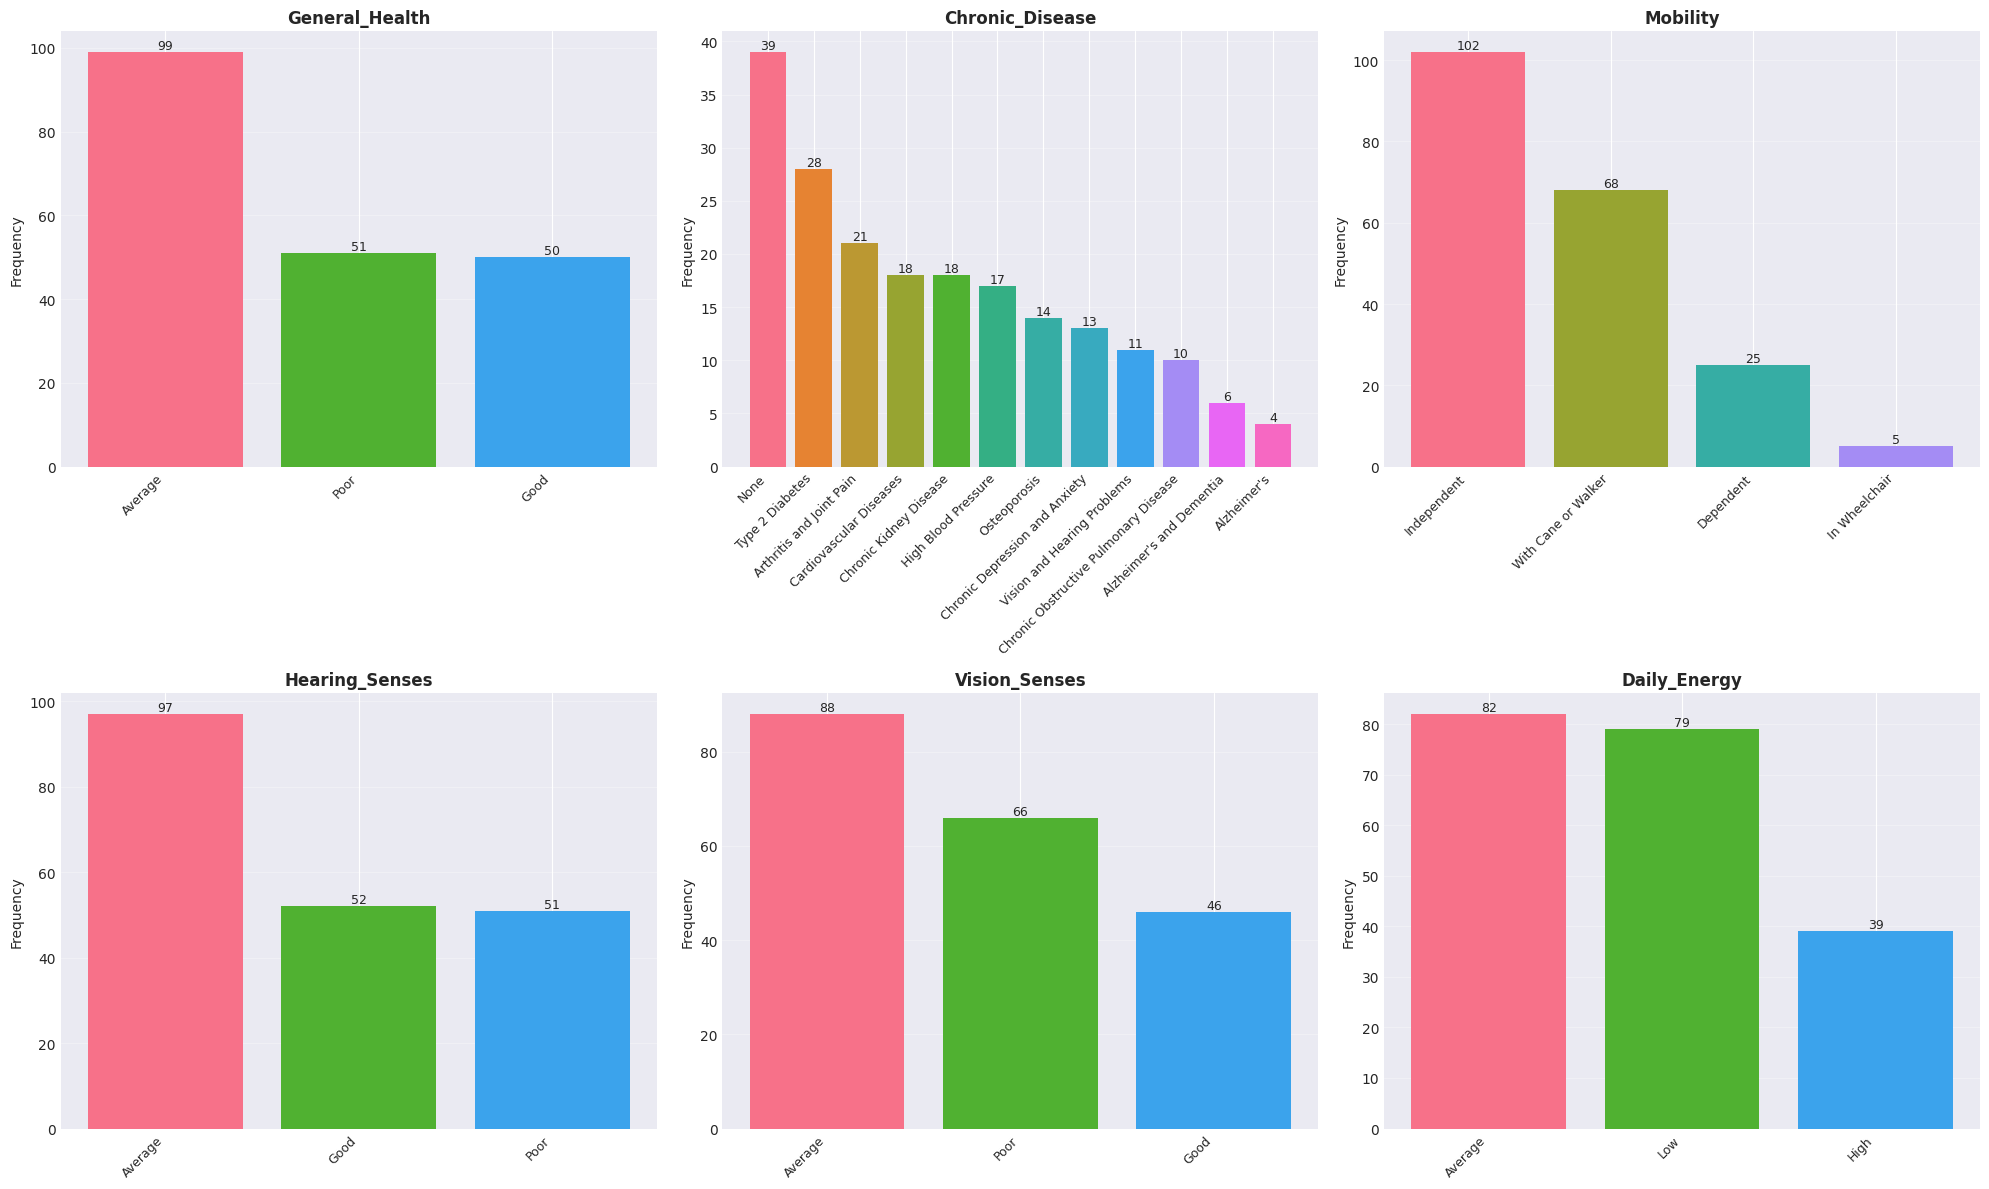


CROSS-TABULATION: General Health vs Daily Energy
daily_energy    Average  High  Low  All
general_health                         
Average              70     1   28   99
Good                 12    38    0   50
Poor                  0     0   51   51
All                  82    39   79  200

CROSS-TABULATION: Mobility vs General Health
general_health       Average  Good  Poor  All
mobility                                     
Dependent                  0     0    25   25
In Wheelchair              1     0     4    5
Independent               53    48     1  102
With Cane or Walker       45     2    21   68
All                       99    50    51  200


In [35]:
# Biological component variables
bio_vars = ['general_health', 'chronic_disease', 'mobility', 'hearing_senses', 'vision_senses', 'daily_energy']

print("=" * 100)
print("BIOLOGICAL COMPONENT - COMPLETE ANALYSIS")
print("=" * 100)

# Analyze each biological variable
for var in bio_vars:
    print(f"\n{'=' * 100}")
    print(f"{var.upper()}")
    print(f"{'=' * 100}")
    
    # Clean data: remove None/NaN values
    clean_data = df[var].dropna()
    
    print(f"Total responses: {len(clean_data)} (Missing: {df[var].isnull().sum()})")
    print(f"\nValue counts:")
    value_counts = clean_data.value_counts()
    value_pct = clean_data.value_counts(normalize=True) * 100
    
    for value, count in value_counts.items():
        print(f"  {value}: {count} ({value_pct[value]:.2f}%)")
    
    print(f"\nUnique values: {clean_data.nunique()}")
    print(f"Available values: {sorted(clean_data.unique().tolist())}")

# Visualizations
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()

for idx, var in enumerate(bio_vars):
    clean_data = df[var].dropna()
    value_counts = clean_data.value_counts()
    
    # Bar chart
    axes[idx].bar(range(len(value_counts)), value_counts.values, 
                  color=sns.color_palette('husl', len(value_counts)))
    axes[idx].set_xticks(range(len(value_counts)))
    axes[idx].set_xticklabels(value_counts.index, rotation=45, ha='right', fontsize=9)
    axes[idx].set_ylabel('Frequency', fontsize=10)
    axes[idx].set_title(var.title(), fontsize=12, fontweight='bold')
    axes[idx].grid(True, alpha=0.3, axis='y')
    
    # Add value labels on bars
    for i, v in enumerate(value_counts.values):
        axes[idx].text(i, v, str(v), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Cross-tabulation: General Health vs Daily Energy
print("\n" + "=" * 100)
print("CROSS-TABULATION: General Health vs Daily Energy")
print("=" * 100)
crosstab = pd.crosstab(df['general_health'], df['daily_energy'], margins=True)
print(crosstab.to_string())

# Mobility vs General Health
print("\n" + "=" * 100)
print("CROSS-TABULATION: Mobility vs General Health")
print("=" * 100)
crosstab2 = pd.crosstab(df['mobility'], df['general_health'], margins=True)
print(crosstab2.to_string())


## 6. Psychological Component Analysis


PSYCHOLOGICAL COMPONENT - COMPLETE ANALYSIS

PERSONALITY_TYPE
Total responses: 200 (Missing: 0)

Value counts:
  ISFJ: 26 (13.00%)
  ISTJ: 21 (10.50%)
  ISFP: 18 (9.00%)
  ESFJ: 17 (8.50%)
  ISTP: 16 (8.00%)
  ENFP: 15 (7.50%)
  INFJ: 15 (7.50%)
  ENFJ: 12 (6.00%)
  ESTP: 12 (6.00%)
  INTJ: 10 (5.00%)
  INFP: 10 (5.00%)
  ESFP: 9 (4.50%)
  INTP: 6 (3.00%)
  ESTJ: 6 (3.00%)
  ENTP: 5 (2.50%)
  ENTJ: 2 (1.00%)

Unique values: 16
Available values: ['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP', 'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP']

COGNITIVE_STATUS
Total responses: 200 (Missing: 0)

Value counts:
  Healthy Memory: 108 (54.00%)
  Mild Forgetfulness: 75 (37.50%)
  Alzheimer's: 17 (8.50%)

Unique values: 3
Available values: ["Alzheimer's", 'Healthy Memory', 'Mild Forgetfulness']

DOMINANT_EMOTION
Total responses: 200 (Missing: 0)

Value counts:
  Calm: 67 (33.50%)
  Happy: 55 (27.50%)
  Sad: 40 (20.00%)
  Anxious: 38 (19.00%)

Unique values: 4
Avai

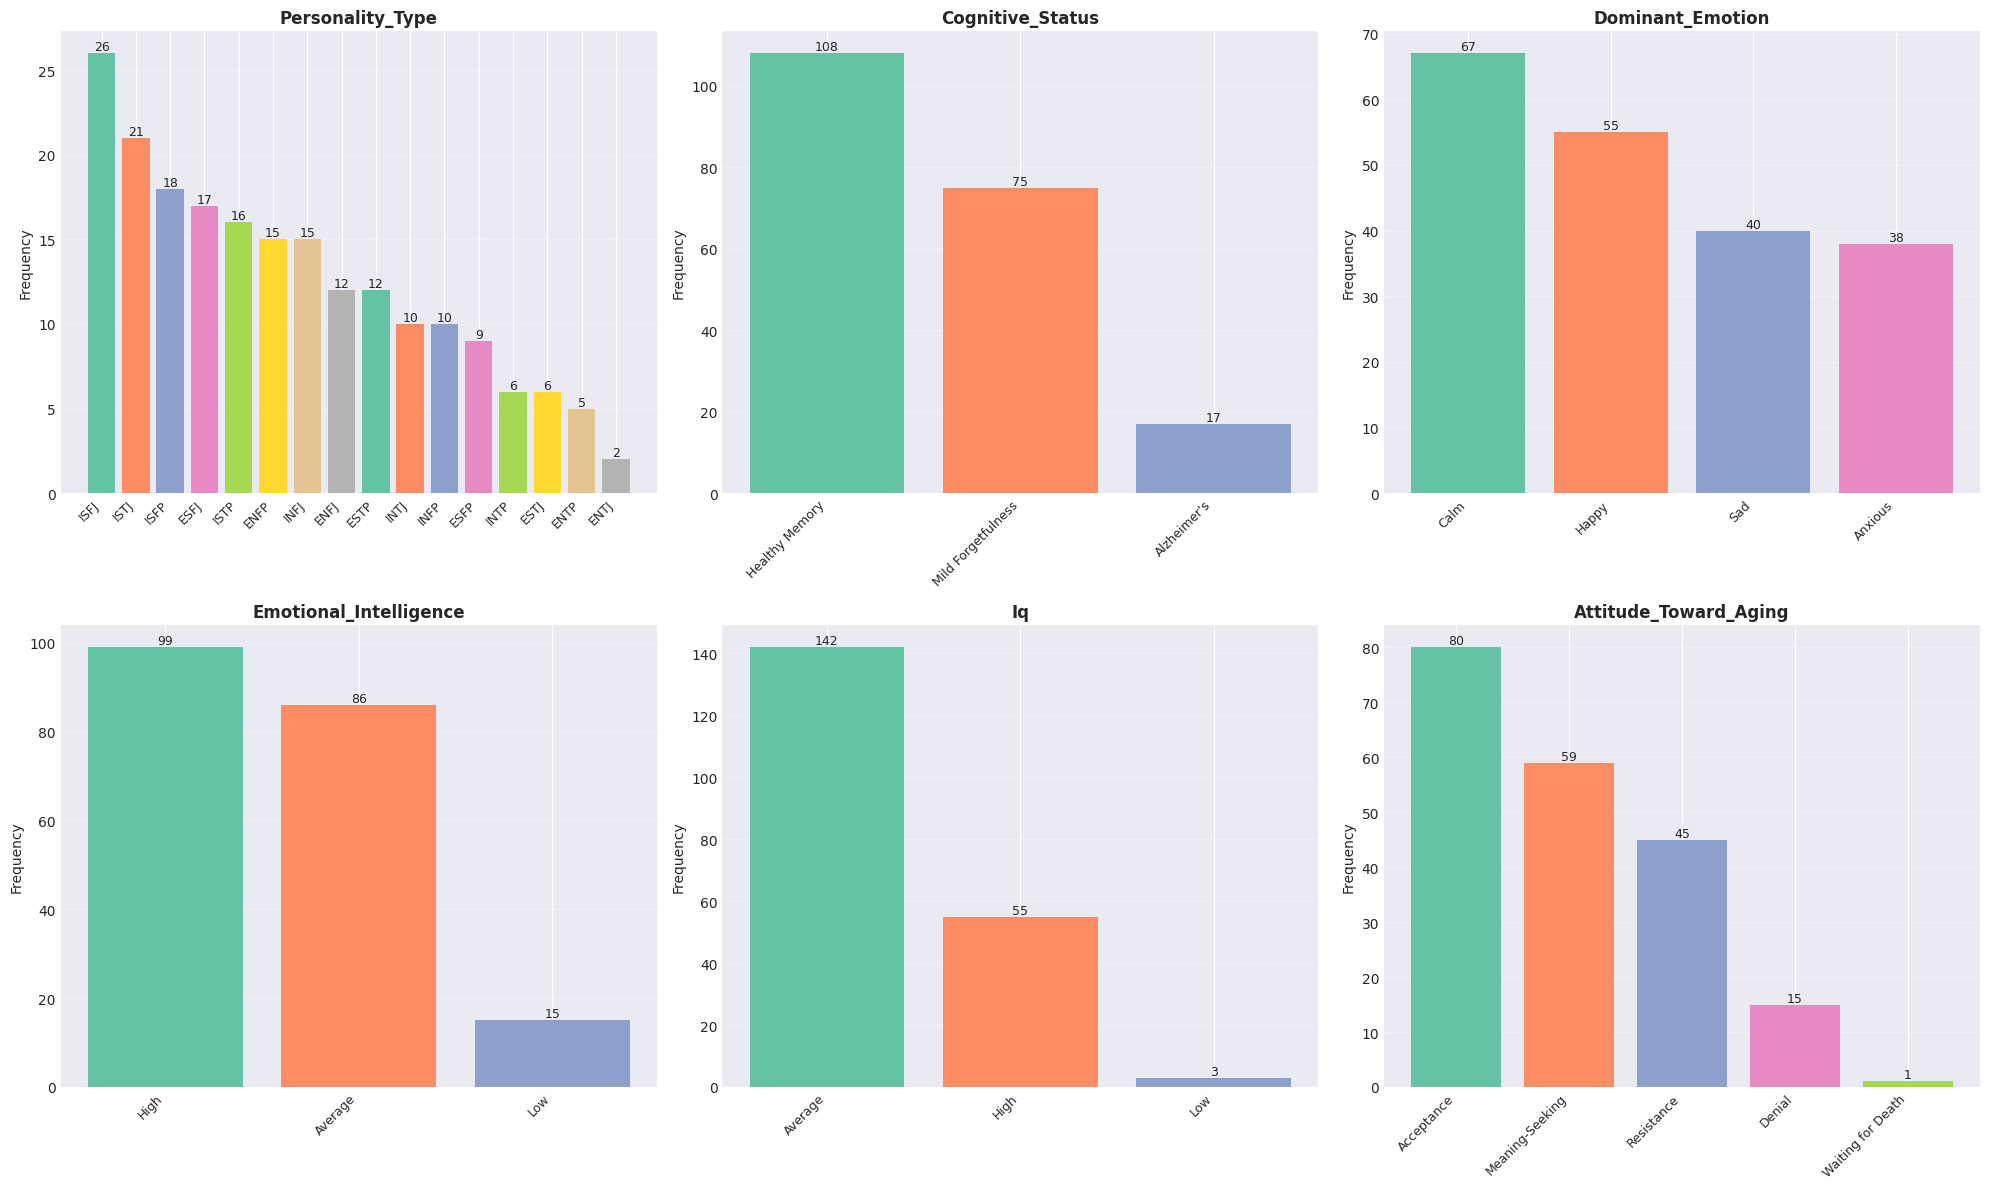


MBTI PERSONALITY TYPE BREAKDOWN
Total MBTI entries: 200

MBTI Distribution:
personality_type
ISFJ    26
ISTJ    21
ISFP    18
ESFJ    17
ISTP    16
ENFP    15
INFJ    15
ENFJ    12
ESTP    12
INTJ    10
INFP    10
ESFP     9
INTP     6
ESTJ     6
ENTP     5
ENTJ     2

MBTI Dimension Analysis:
  E vs I: E=78, I=122
  S vs N: S=125, N=75
  T vs F: T=78, F=122
  J vs P: J=109, P=91

CROSS-TABULATION: Cognitive Status vs Dominant Emotion
dominant_emotion    Anxious  Calm  Happy  Sad  All
cognitive_status                                  
Alzheimer's               6     1      0   10   17
Healthy Memory           16    40     50    2  108
Mild Forgetfulness       16    26      5   28   75
All                      38    67     55   40  200


In [37]:
# Psychological component variables
psych_vars = ['personality_type', 'cognitive_status', 'dominant_emotion',
              'emotional_intelligence', 'iq', 'attitude_toward_aging']

print("=" * 100)
print("PSYCHOLOGICAL COMPONENT - COMPLETE ANALYSIS")
print("=" * 100)

# Analyze each psychological variable
for var in psych_vars:
    print(f"\n{'=' * 100}")
    print(f"{var.upper()}")
    print(f"{'=' * 100}")
    
    # Clean data: remove None/NaN values
    clean_data = df[var].dropna()
    
    print(f"Total responses: {len(clean_data)} (Missing: {df[var].isnull().sum()})")
    print(f"\nValue counts:")
    value_counts = clean_data.value_counts()
    value_pct = clean_data.value_counts(normalize=True) * 100
    
    for value, count in value_counts.items():
        print(f"  {value}: {count} ({value_pct[value]:.2f}%)")
    
    print(f"\nUnique values: {clean_data.nunique()}")
    print(f"Available values: {sorted(clean_data.unique().tolist())}")

# Visualizations
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()

for idx, var in enumerate(psych_vars):
    clean_data = df[var].dropna()
    value_counts = clean_data.value_counts()
    
    # Bar chart
    axes[idx].bar(range(len(value_counts)), value_counts.values, 
                  color=sns.color_palette('Set2', len(value_counts)))
    axes[idx].set_xticks(range(len(value_counts)))
    axes[idx].set_xticklabels(value_counts.index, rotation=45, ha='right', fontsize=9)
    axes[idx].set_ylabel('Frequency', fontsize=10)
    axes[idx].set_title(var.title(), fontsize=12, fontweight='bold')
    axes[idx].grid(True, alpha=0.3, axis='y')
    
    # Add value labels on bars
    for i, v in enumerate(value_counts.values):
        axes[idx].text(i, v, str(v), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# MBTI Personality Type Analysis
print("\n" + "=" * 100)
print("MBTI PERSONALITY TYPE BREAKDOWN")
print("=" * 100)
mbti_data = df['personality_type'].dropna()
print(f"Total MBTI entries: {len(mbti_data)}")
print(f"\nMBTI Distribution:")
print(mbti_data.value_counts().to_string())

# Analyze MBTI dimensions
if len(mbti_data) > 0:
    print(f"\nMBTI Dimension Analysis:")
    mbti_list = mbti_data.tolist()
    
    # Extract dimensions
    e_i = [p[0] for p in mbti_list if len(p) == 4]
    s_n = [p[1] for p in mbti_list if len(p) == 4]
    t_f = [p[2] for p in mbti_list if len(p) == 4]
    j_p = [p[3] for p in mbti_list if len(p) == 4]
    
    print(f"  E vs I: E={e_i.count('E')}, I={e_i.count('I')}")
    print(f"  S vs N: S={s_n.count('S')}, N={s_n.count('N')}")
    print(f"  T vs F: T={t_f.count('T')}, F={t_f.count('F')}")
    print(f"  J vs P: J={j_p.count('J')}, P={j_p.count('P')}")

# Cognitive Status vs Dominant Emotion
print("\n" + "=" * 100)
print("CROSS-TABULATION: Cognitive Status vs Dominant Emotion")
print("=" * 100)
crosstab = pd.crosstab(df['cognitive_status'], df['dominant_emotion'], margins=True)
print(crosstab.to_string())


## 7. Social Component Analysis


SOCIAL COMPONENT - COMPLETE ANALYSIS

MAIN_ROLE
Total responses: 200 (Missing: 0)

Value counts:
  Grandmother: 74 (37.00%)
  Retired: 70 (35.00%)
  Grandfather: 40 (20.00%)
  Social Activist: 16 (8.00%)

Unique values: 4
Available values: ['Grandfather', 'Grandmother', 'Retired', 'Social Activist']

SUPPORT
Total responses: 200 (Missing: 0)

Value counts:
  Large Family: 136 (68.00%)
  Supportive Friends: 47 (23.50%)
  Alone: 15 (7.50%)
  Government Support: 2 (1.00%)

Unique values: 4
Available values: ['Alone', 'Government Support', 'Large Family', 'Supportive Friends']

PARTICIPATION
Total responses: 200 (Missing: 0)

Value counts:
  Active: 138 (69.00%)
  Inactive: 62 (31.00%)

Unique values: 2
Available values: ['Active', 'Inactive']


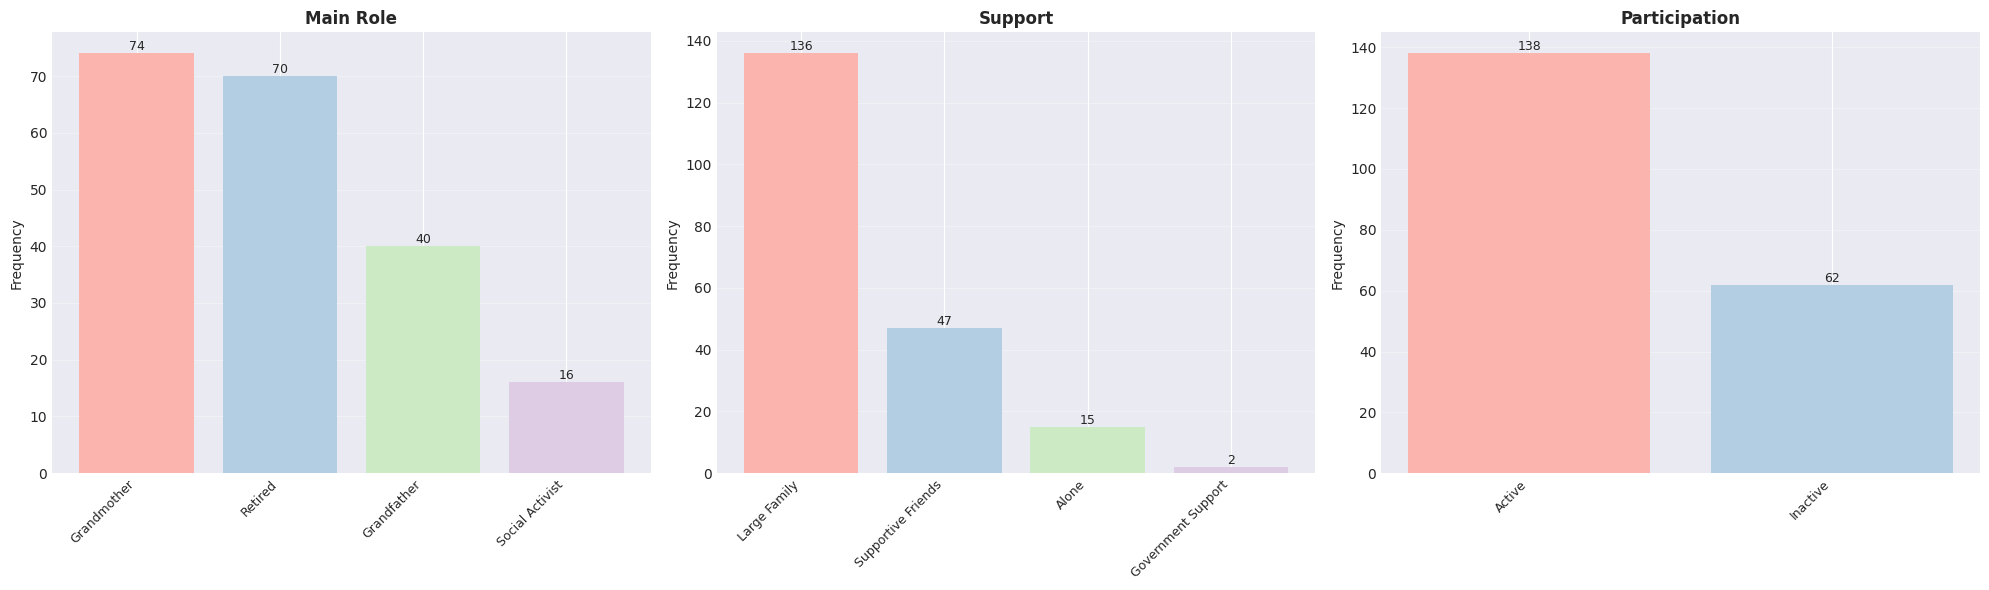


CROSS-TABULATION: Social Support vs Social Participation
social_participation  Active  Inactive  All
social_support                             
Alone                      0        15   15
Government Support         0         2    2
Large Family             100        36  136
Supportive Friends        38         9   47
All                      138        62  200


In [ ]:
# Social component variables
social_vars = ['main_social_role', 'social_support', 'social_participation']

print("=" * 100)
print("SOCIAL COMPONENT - COMPLETE ANALYSIS")
print("=" * 100)

# Analyze each social variable
for var in social_vars:
    print(f"\n{'=' * 100}")
    print(f"{var.upper()}")
    print(f"{'=' * 100}")
    
    # Clean data: remove None/NaN values
    clean_data = df[var].dropna()
    
    print(f"Total responses: {len(clean_data)} (Missing: {df[var].isnull().sum()})")
    print(f"\nValue counts:")
    value_counts = clean_data.value_counts()
    value_pct = clean_data.value_counts(normalize=True) * 100
    
    for value, count in value_counts.items():
        print(f"  {value}: {count} ({value_pct[value]:.2f}%)")
    
    print(f"\nUnique values: {clean_data.nunique()}")
    print(f"Available values: {sorted(clean_data.unique().tolist())}")

# Visualizations
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

for idx, var in enumerate(social_vars):
    clean_data = df[var].dropna()
    value_counts = clean_data.value_counts()
    
    # Bar chart
    axes[idx].bar(range(len(value_counts)), value_counts.values, 
                  color=sns.color_palette('Pastel1', len(value_counts)))
    axes[idx].set_xticks(range(len(value_counts)))
    axes[idx].set_xticklabels(value_counts.index, rotation=45, ha='right', fontsize=9)
    axes[idx].set_ylabel('Frequency', fontsize=10)
    axes[idx].set_title(var.title(), fontsize=12, fontweight='bold')
    axes[idx].grid(True, alpha=0.3, axis='y')
    
    # Add value labels on bars
    for i, v in enumerate(value_counts.values):
        axes[idx].text(i, v, str(v), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Cross-tabulation: Social Support vs Social Participation
print("\n" + "=" * 100)
print("CROSS-TABULATION: Social Support vs Social Participation")
print("=" * 100)
crosstab = pd.crosstab(df['social_support'], df['social_participation'], margins=True)
print(crosstab.to_string())


## 8. Economic Component Analysis


ECONOMIC COMPONENT - COMPLETE ANALYSIS

INCOME
Total responses: 200 (Missing: 0)

Value counts:
  Retirement Pension: 82 (41.00%)
  Dependent on Children: 63 (31.50%)
  Independent: 45 (22.50%)
  No Income: 10 (5.00%)

Unique values: 4
Available values: ['Dependent on Children', 'Independent', 'No Income', 'Retirement Pension']

ECONOMIC_DECILE
Total responses: 200 (Missing: 0)

Statistics:
count    200.000000
mean       4.350000
std        2.016888
min        1.000000
25%        3.000000
50%        4.000000
75%        6.000000
max        8.000000
Name: economic_decile, dtype: float64

Value counts:
  1: 16 (8.00%)
  2: 29 (14.50%)
  3: 31 (15.50%)
  4: 27 (13.50%)
  5: 33 (16.50%)
  6: 30 (15.00%)
  7: 22 (11.00%)
  8: 12 (6.00%)

Unique values: 8
Available values: [1, 2, 3, 4, 5, 6, 7, 8]

HOUSING
Total responses: 200 (Missing: 0)

Value counts:
  Own Home: 165 (82.50%)
  Rented: 33 (16.50%)
  Nursing Home: 2 (1.00%)

Unique values: 3
Available values: ['Nursing Home', 'Own Home', 'R

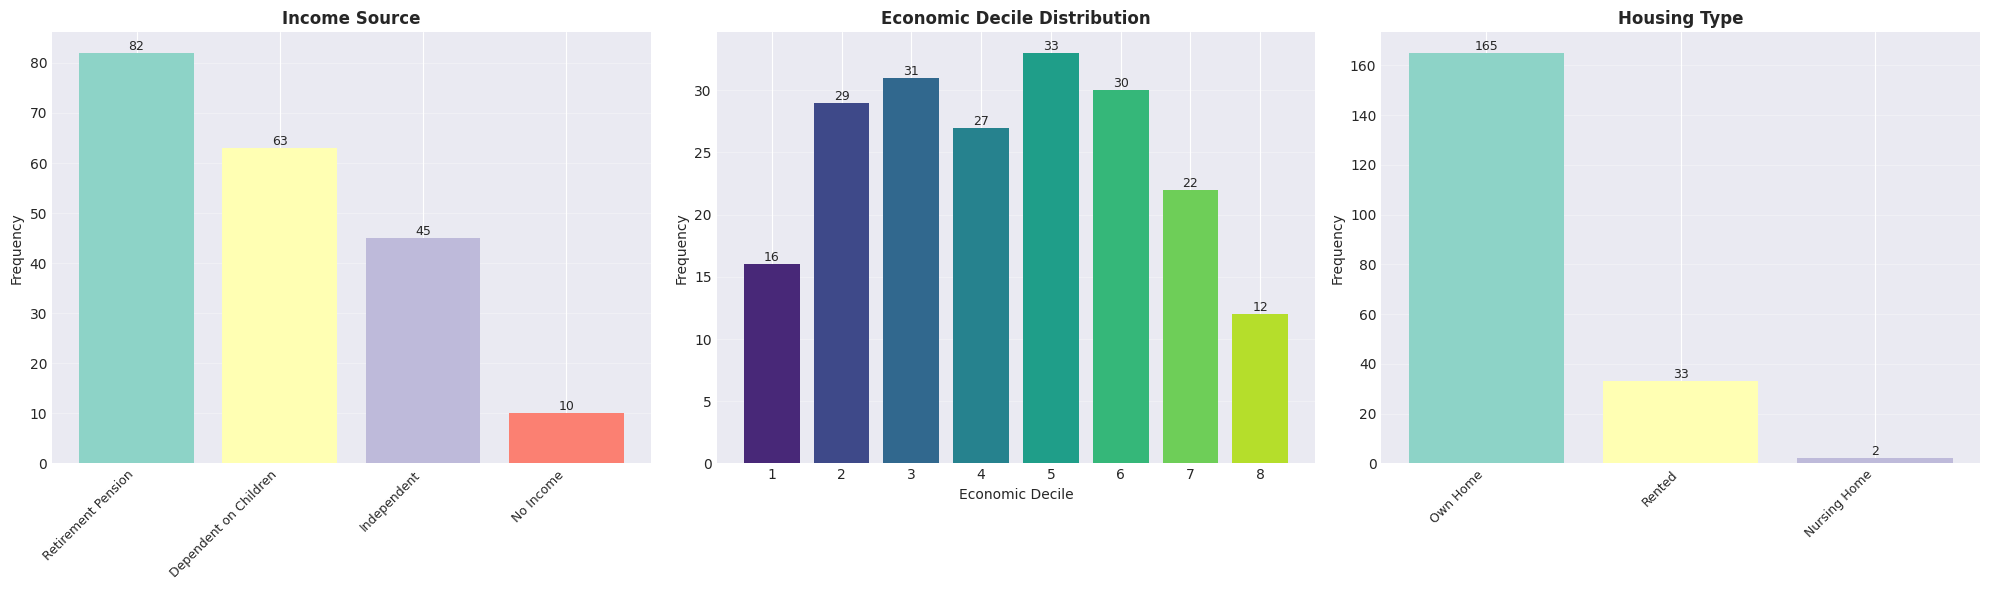


CROSS-TABULATION: Income vs Housing
housing                Nursing Home  Own Home  Rented  All
income                                                    
Dependent on Children             0        53      10   63
Independent                       0        35      10   45
No Income                         1         5       4   10
Retirement Pension                1        72       9   82
All                               2       165      33  200

ECONOMIC DECILE BY INCOME SOURCE
                       count      mean       std  min   25%  50%  75%  max
income                                                                    
Dependent on Children   63.0  2.746032  1.269598  1.0  2.00  3.0  4.0  6.0
Independent             45.0  6.044444  1.223920  4.0  5.00  6.0  7.0  8.0
No Income               10.0  1.900000  0.737865  1.0  1.25  2.0  2.0  3.0
Retirement Pension      82.0  4.951220  1.784034  2.0  3.25  5.0  6.0  8.0


In [39]:
# Economic component variables
econ_vars = ['income', 'economic_decile', 'housing']

print("=" * 100)
print("ECONOMIC COMPONENT - COMPLETE ANALYSIS")
print("=" * 100)

# Analyze each economic variable
for var in econ_vars:
    print(f"\n{'=' * 100}")
    print(f"{var.upper()}")
    print(f"{'=' * 100}")
    
    # Clean data: remove None/NaN values
    clean_data = df[var].dropna()
    
    print(f"Total responses: {len(clean_data)} (Missing: {df[var].isnull().sum()})")
    
    # For numeric data (economic_decile)
    if var == 'economic_decile':
        print(f"\nStatistics:")
        print(clean_data.describe())
        print(f"\nValue counts:")
        value_counts = clean_data.value_counts().sort_index()
    else:
        print(f"\nValue counts:")
        value_counts = clean_data.value_counts()
    
    value_pct = value_counts / len(clean_data) * 100
    
    for value, count in value_counts.items():
        print(f"  {value}: {count} ({value_pct[value]:.2f}%)")
    
    print(f"\nUnique values: {clean_data.nunique()}")
    if var != 'econ_decile':
        print(f"Available values: {sorted(clean_data.unique().tolist())}")

# Visualizations
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Income
clean_data = df['income'].dropna()
value_counts = clean_data.value_counts()
axes[0].bar(range(len(value_counts)), value_counts.values, 
            color=sns.color_palette('Set3', len(value_counts)))
axes[0].set_xticks(range(len(value_counts)))
axes[0].set_xticklabels(value_counts.index, rotation=45, ha='right', fontsize=9)
axes[0].set_ylabel('Frequency', fontsize=10)
axes[0].set_title('Income Source', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(value_counts.values):
    axes[0].text(i, v, str(v), ha='center', va='bottom', fontsize=9)

# Economic Decile
clean_data = df['economic_decile'].dropna()
value_counts = clean_data.value_counts().sort_index()
axes[1].bar(value_counts.index, value_counts.values, 
            color=sns.color_palette('viridis', len(value_counts)))
axes[1].set_xlabel('Economic Decile', fontsize=10)
axes[1].set_ylabel('Frequency', fontsize=10)
axes[1].set_title('Economic Decile Distribution', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='y')
for i, v in zip(value_counts.index, value_counts.values):
    axes[1].text(i, v, str(v), ha='center', va='bottom', fontsize=9)

# Housing
clean_data = df['housing'].dropna()
value_counts = clean_data.value_counts()
axes[2].bar(range(len(value_counts)), value_counts.values, 
            color=sns.color_palette('Set3', len(value_counts)))
axes[2].set_xticks(range(len(value_counts)))
axes[2].set_xticklabels(value_counts.index, rotation=45, ha='right', fontsize=9)
axes[2].set_ylabel('Frequency', fontsize=10)
axes[2].set_title('Housing Type', fontsize=12, fontweight='bold')
axes[2].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(value_counts.values):
    axes[2].text(i, v, str(v), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Cross-tabulation: Income vs Housing
print("\n" + "=" * 100)
print("CROSS-TABULATION: Income vs Housing")
print("=" * 100)
crosstab = pd.crosstab(df['income'], df['housing'], margins=True)
print(crosstab.to_string())

# Economic Decile statistics by Income
print("\n" + "=" * 100)
print("ECONOMIC DECILE BY INCOME SOURCE")
print("=" * 100)
decile_by_income = df.groupby('income')['economic_decile'].describe()
print(decile_by_income.to_string())


## 9. Cultural & Value Component Analysis


CULTURAL & VALUE COMPONENT - COMPLETE ANALYSIS

RELIGION_AND_SECT
Total responses: 200 (Missing: 0)

Value counts:
  Shia Muslim: 126 (63.00%)
  Sunni Muslim: 54 (27.00%)
  Jewish: 11 (5.50%)
  Zoroastrian: 5 (2.50%)
  Christian: 4 (2.00%)

Unique values: 5
Available values: ['Christian', 'Jewish', 'Shia Muslim', 'Sunni Muslim', 'Zoroastrian']

RELIGIOSITY_LEVEL
Total responses: 200 (Missing: 0)

Value counts:
  Average: 107 (53.50%)
  High: 75 (37.50%)
  Low: 18 (9.00%)

Unique values: 3
Available values: ['Average', 'High', 'Low']

ETHNICITY
Total responses: 200 (Missing: 0)

Value counts:
  Persian: 56 (28.00%)
  Azeri: 21 (10.50%)
  Kurdish: 21 (10.50%)
  Lur: 18 (9.00%)
  Baloch: 18 (9.00%)
  Mazandarani: 17 (8.50%)
  Turkmen: 14 (7.00%)
  Arab: 12 (6.00%)
  Gilaki: 12 (6.00%)
  Qashqai: 11 (5.50%)

Unique values: 10
Available values: ['Arab', 'Azeri', 'Baloch', 'Gilaki', 'Kurdish', 'Lur', 'Mazandarani', 'Persian', 'Qashqai', 'Turkmen']

LANGUAGE
Total responses: 200 (Missing: 0)


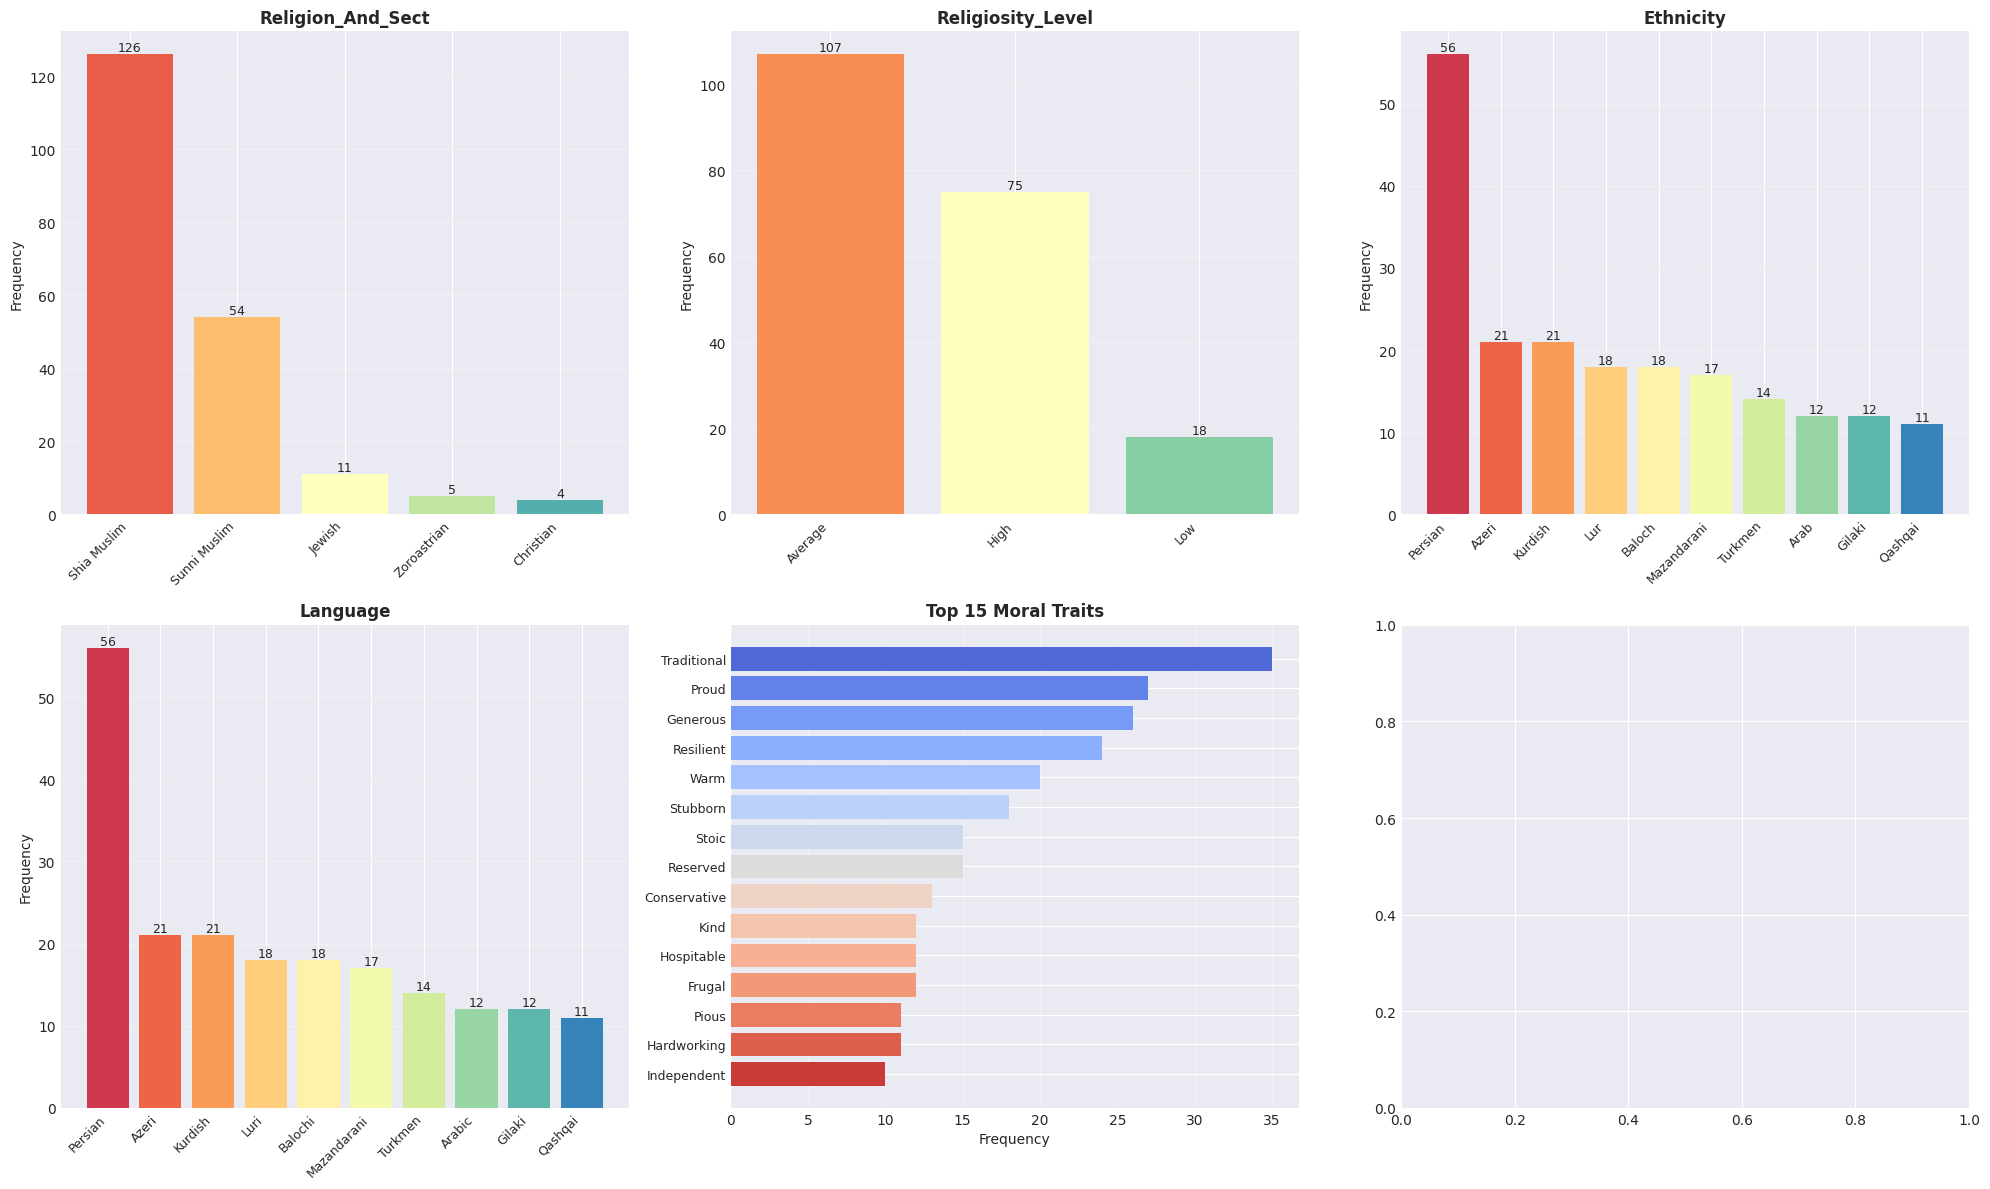


CROSS-TABULATION: Religion vs Religiosity Level
religiosity_level  Average  High  Low  All
religion_and_sect                         
Christian                3     1    0    4
Jewish                   7     4    0   11
Shia Muslim             66    45   15  126
Sunni Muslim            26    25    3   54
Zoroastrian              5     0    0    5
All                    107    75   18  200

CROSS-TABULATION: Ethnicity vs Language
language     Arabic  Azeri  Balochi  Gilaki  Kurdish  Luri  Mazandarani  Persian  Qashqai  Turkmen  All
ethnicity                                                                                              
Arab             12      0        0       0        0     0            0        0        0        0   12
Azeri             0     21        0       0        0     0            0        0        0        0   21
Baloch            0      0       18       0        0     0            0        0        0        0   18
Gilaki            0      0        0      12   

In [41]:
# Cultural component variables (excluding internalized_moral_traits which is a list)
cultural_vars = ['religion_and_sect', 'religiosity_level', 'ethnicity', 'language']

print("=" * 100)
print("CULTURAL & VALUE COMPONENT - COMPLETE ANALYSIS")
print("=" * 100)

# Analyze each cultural variable
for var in cultural_vars:
    print(f"\n{'=' * 100}")
    print(f"{var.upper()}")
    print(f"{'=' * 100}")
    
    # Clean data: remove None/NaN values
    clean_data = df[var].dropna()
    
    print(f"Total responses: {len(clean_data)} (Missing: {df[var].isnull().sum()})")
    print(f"\nValue counts:")
    value_counts = clean_data.value_counts()
    value_pct = clean_data.value_counts(normalize=True) * 100
    
    for value, count in value_counts.items():
        print(f"  {value}: {count} ({value_pct[value]:.2f}%)")
    
    print(f"\nUnique values: {clean_data.nunique()}")
    print(f"Available values: {sorted(clean_data.unique().tolist())}")

# MORAL TRAITS ANALYSIS (List variable)
print("\n" + "=" * 100)
print("MORAL TRAITS (LIST VARIABLE)")
print("=" * 100)

# Extract all moral traits from lists
all_moral_traits = []
for traits_list in df['internalized_moral_traits'].dropna():
    if isinstance(traits_list, list):
        all_moral_traits.extend(traits_list)

if all_moral_traits:
    moral_counts = Counter(all_moral_traits)
    print(f"Total moral trait entries: {len(all_moral_traits)}")
    print(f"Unique moral traits: {len(moral_counts)}")
    print(f"\nMoral traits frequency:")
    for trait, count in moral_counts.most_common():
        pct = (count / len(all_moral_traits)) * 100
        print(f"  {trait}: {count} ({pct:.2f}%)")
    print(f"\nAll unique moral traits: {sorted(moral_counts.keys())}")

# Visualizations
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()

# Plot first 5 cultural variables
for idx, var in enumerate(cultural_vars):
    clean_data = df[var].dropna()
    value_counts = clean_data.value_counts()
    
    # Bar chart
    axes[idx].bar(range(len(value_counts)), value_counts.values, 
                  color=sns.color_palette('Spectral', len(value_counts)))
    axes[idx].set_xticks(range(len(value_counts)))
    axes[idx].set_xticklabels(value_counts.index, rotation=45, ha='right', fontsize=9)
    axes[idx].set_ylabel('Frequency', fontsize=10)
    axes[idx].set_title(var.title(), fontsize=12, fontweight='bold')
    axes[idx].grid(True, alpha=0.3, axis='y')
    
    # Add value labels on bars
    for i, v in enumerate(value_counts.values):
        axes[idx].text(i, v, str(v), ha='center', va='bottom', fontsize=9)

# Plot moral traits in the 6th subplot
if all_moral_traits:
    moral_counts_series = pd.Series(moral_counts).sort_values(ascending=False).head(15)
    axes[4].barh(range(len(moral_counts_series)), moral_counts_series.values,
                 color=sns.color_palette('coolwarm', len(moral_counts_series)))
    axes[4].set_yticks(range(len(moral_counts_series)))
    axes[4].set_yticklabels(moral_counts_series.index, fontsize=9)
    axes[4].set_xlabel('Frequency', fontsize=10)
    axes[4].set_title('Top 15 Moral Traits', fontsize=12, fontweight='bold')
    axes[4].grid(True, alpha=0.3, axis='x')
    axes[4].invert_yaxis()

plt.tight_layout()
plt.show()

# Cross-tabulation: Religion vs Religiosity Level
print("\n" + "=" * 100)
print("CROSS-TABULATION: Religion vs Religiosity Level")
print("=" * 100)
crosstab = pd.crosstab(df['religion_and_sect'], df['religiosity_level'], margins=True)
print(crosstab.to_string())

# Ethnicity vs Language
print("\n" + "=" * 100)
print("CROSS-TABULATION: Ethnicity vs Language")
print("=" * 100)
crosstab2 = pd.crosstab(df['ethnicity'], df['language'], margins=True)
print(crosstab2.to_string())


## 10. Contextual Component Analysis


CONTEXTUAL COMPONENT - COMPLETE ANALYSIS

LIFE_SATISFACTION
Total responses: 200 (Missing: 0)

Value counts:
  Satisfied: 81 (40.50%)
  Neutral: 68 (34.00%)
  Dissatisfied: 51 (25.50%)

Unique values: 3
Available values: ['Dissatisfied', 'Neutral', 'Satisfied']

MEANING_AND_PURPOSE_IN_OLD_AGE
Total responses: 200 (Missing: 0)

Value counts:
  Helping Family: 106 (53.00%)
  Spiritual Activities: 45 (22.50%)
  Waiting for Death: 35 (17.50%)
  Pleasure-Seeking: 13 (6.50%)
  Meaning-Seeking: 1 (0.50%)

Unique values: 5
Available values: ['Helping Family', 'Meaning-Seeking', 'Pleasure-Seeking', 'Spiritual Activities', 'Waiting for Death']

PERSONAL EXPERIENCES (LIST VARIABLE)
Total personal experience entries: 129
Unique personal experiences: 8

Personal experiences frequency:
  Loss of Loved Ones: 29 (22.48%)
  Economic Hardship: 26 (20.16%)
  Educational Achievement: 22 (17.05%)
  Career Success: 21 (16.28%)
  War Experience: 17 (13.18%)
  Battle with Serious Illness (e.g., Cancer, Chroni

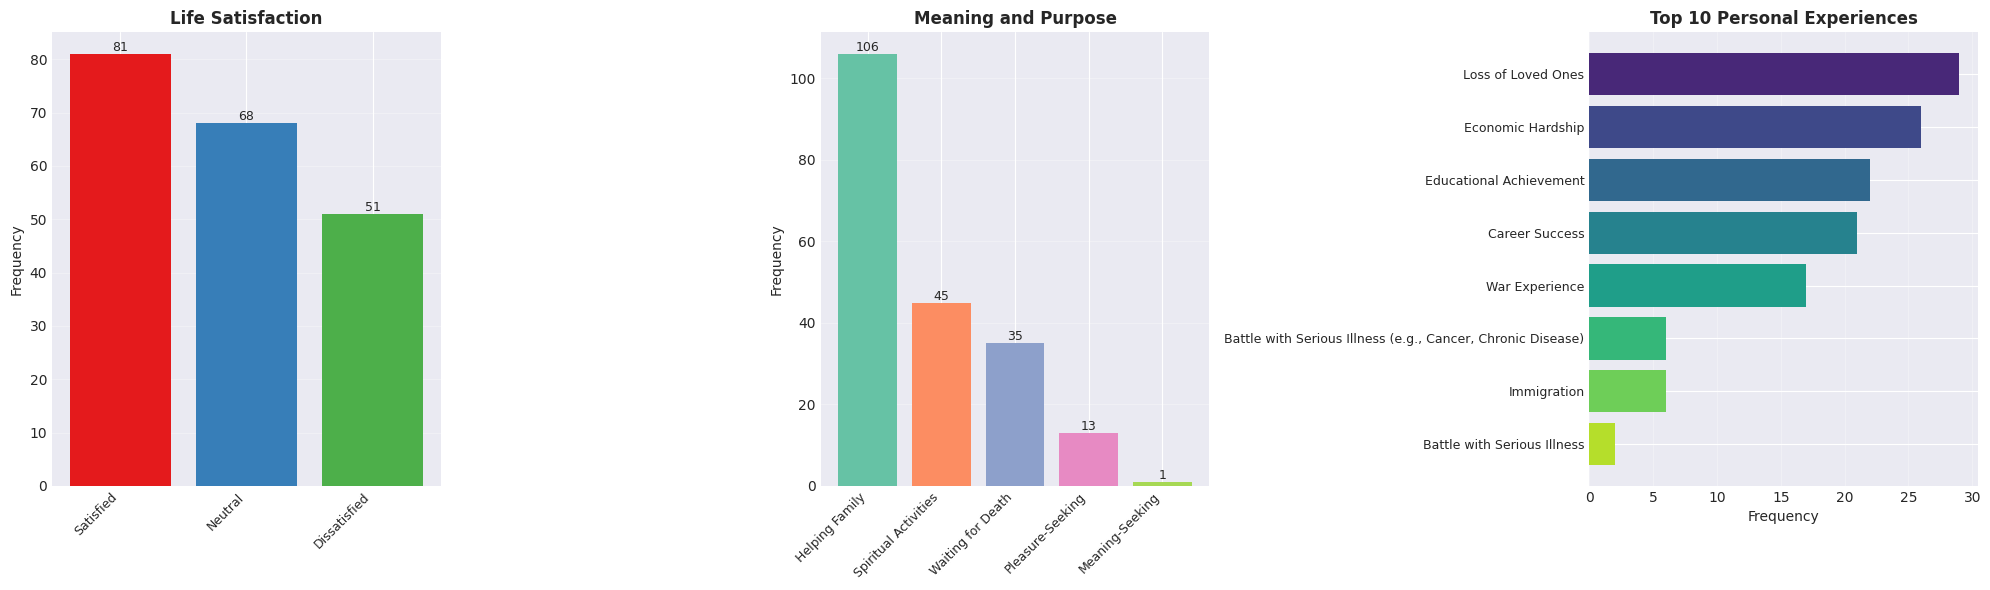


CROSS-TABULATION: Life Satisfaction vs Meaning and Purpose
meaning_and_purpose_in_old_age  Helping Family  Meaning-Seeking  Pleasure-Seeking  Spiritual Activities  Waiting for Death  All
life_satisfaction                                                                                                              
Dissatisfied                                11                0                 3                    10                 27   51
Neutral                                     36                0                 2                    22                  8   68
Satisfied                                   59                1                 8                    13                  0   81
All                                        106                1                13                    45                 35  200


In [48]:
# Contextual component variables (excluding list variables)
context_vars = ['life_satisfaction', 'meaning_and_purpose_in_old_age']

print("=" * 100)
print("CONTEXTUAL COMPONENT - COMPLETE ANALYSIS")
print("=" * 100)

# Analyze each contextual variable
for var in context_vars:
    print(f"\n{'=' * 100}")
    print(f"{var.upper()}")
    print(f"{'=' * 100}")
    
    # Clean data: remove None/NaN values
    clean_data = df[var].dropna()
    
    print(f"Total responses: {len(clean_data)} (Missing: {df[var].isnull().sum()})")
    print(f"\nValue counts:")
    value_counts = clean_data.value_counts()
    value_pct = clean_data.value_counts(normalize=True) * 100
    
    for value, count in value_counts.items():
        print(f"  {value}: {count} ({value_pct[value]:.2f}%)")
    
    print(f"\nUnique values: {clean_data.nunique()}")
    print(f"Available values: {sorted(clean_data.unique().tolist())}")

# PERSONAL EXPERIENCES ANALYSIS (List variable)
print("\n" + "=" * 100)
print("PERSONAL EXPERIENCES (LIST VARIABLE)")
print("=" * 100)

# Extract all personal experiences from lists
all_personal_experiences = []
for exp_list in df['important_personal_experiences'].dropna():
    if isinstance(exp_list, list):
        all_personal_experiences.extend(exp_list)

if all_personal_experiences:
    exp_counts = Counter(all_personal_experiences)
    print(f"Total personal experience entries: {len(all_personal_experiences)}")
    print(f"Unique personal experiences: {len(exp_counts)}")
    print(f"\nPersonal experiences frequency:")
    for exp, count in exp_counts.most_common():
        pct = (count / len(all_personal_experiences)) * 100
        print(f"  {exp}: {count} ({pct:.2f}%)")
    print(f"\nAll unique personal experiences: {sorted(exp_counts.keys())}")

# HISTORICAL EVENTS ANALYSIS (List variable)
print("\n" + "=" * 100)
print("HISTORICAL EVENTS (LIST VARIABLE)")
print("=" * 100)

# Visualizations
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Life Satisfaction
clean_data = df['life_satisfaction'].dropna()
value_counts = clean_data.value_counts()
axes[0].bar(range(len(value_counts)), value_counts.values, 
              color=sns.color_palette('Set1', len(value_counts)))
axes[0].set_xticks(range(len(value_counts)))
axes[0].set_xticklabels(value_counts.index, rotation=45, ha='right', fontsize=9)
axes[0].set_ylabel('Frequency', fontsize=10)
axes[0].set_title('Life Satisfaction', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(value_counts.values):
    axes[0].text(i, v, str(v), ha='center', va='bottom', fontsize=9)

# Meaning and Purpose
clean_data = df['meaning_and_purpose_in_old_age'].dropna()
value_counts = clean_data.value_counts()
axes[1].bar(range(len(value_counts)), value_counts.values, 
              color=sns.color_palette('Set2', len(value_counts)))
axes[1].set_xticks(range(len(value_counts)))
axes[1].set_xticklabels(value_counts.index, rotation=45, ha='right', fontsize=9)
axes[1].set_ylabel('Frequency', fontsize=10)
axes[1].set_title('Meaning and Purpose', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(value_counts.values):
    axes[1].text(i, v, str(v), ha='center', va='bottom', fontsize=9)

# Personal Experiences
if all_personal_experiences:
    exp_counts_series = pd.Series(exp_counts).sort_values(ascending=False).head(10)
    axes[2].barh(range(len(exp_counts_series)), exp_counts_series.values,
                   color=sns.color_palette('viridis', len(exp_counts_series)))
    axes[2].set_yticks(range(len(exp_counts_series)))
    axes[2].set_yticklabels(exp_counts_series.index, fontsize=9)
    axes[2].set_xlabel('Frequency', fontsize=10)
    axes[2].set_title('Top 10 Personal Experiences', fontsize=12, fontweight='bold')
    axes[2].grid(True, alpha=0.3, axis='x')
    axes[2].invert_yaxis()


plt.tight_layout()
plt.show()

# Cross-tabulation: Life Satisfaction vs Meaning and Purpose
print("\n" + "=" * 100)
print("CROSS-TABULATION: Life Satisfaction vs Meaning and Purpose")
print("=" * 100)
crosstab = pd.crosstab(df['life_satisfaction'], df['meaning_and_purpose_in_old_age'], margins=True)
print(crosstab.to_string())
